# DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import normal_ad

df = pd.read_csv("/home/repos/recta/Estatura-peso_HyM.csv")
df.head()

,H_estat,H_peso,M_estat,M_peso
0,1.61,72.21,1.53,50.07
1,1.61,65.71,1.60,59.78
2,1.70,75.08,1.54,50.66
3,1.65,68.55,1.58,56.96
4,1.72,70.77,1.61,51.03


<AxesSubplot:>

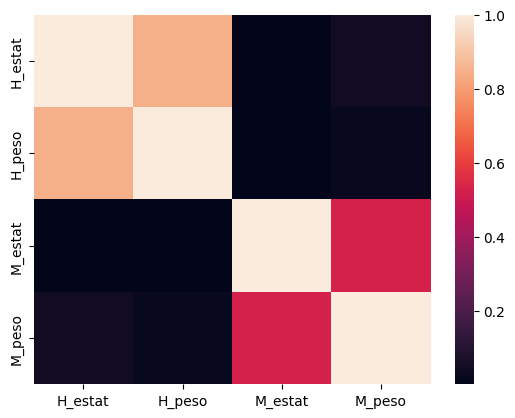

In [2]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

No hay mucha correlación entre estaturas de H vs M, pero si entre estaturas y pesos del mismo sexo. Hay más correlación entre estatura y peso de hombres que entre la de mujeres

In [3]:
df.describe()

,H_estat,H_peso,M_estat,M_peso
count,220.000000,220.000000,220.000000,220.000000
mean,1.653727,72.857682,1.572955,55.083409
std,0.061731,6.900354,0.050368,7.792781
min,1.480000,56.430000,1.440000,37.390000
25%,1.610000,68.257500,1.540000,49.355000
50%,1.650000,72.975000,1.570000,54.485000
75%,1.700000,77.522500,1.610000,59.795000
max,1.800000,90.490000,1.740000,80.870000


la mediana de peso de los hombres es mayor a la mediana de peso de las mujeres y la estarua de un hombre máxima no está muy lejos de la mujer.

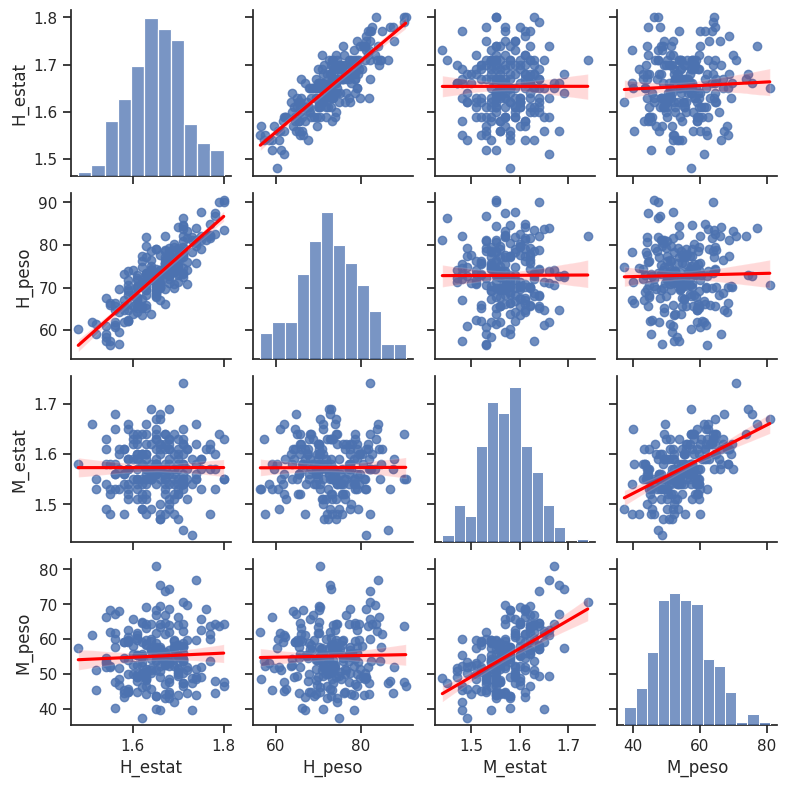

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=2)
plt.show()

Intercept   -83.684539
H_estat      94.660240
dtype: float64


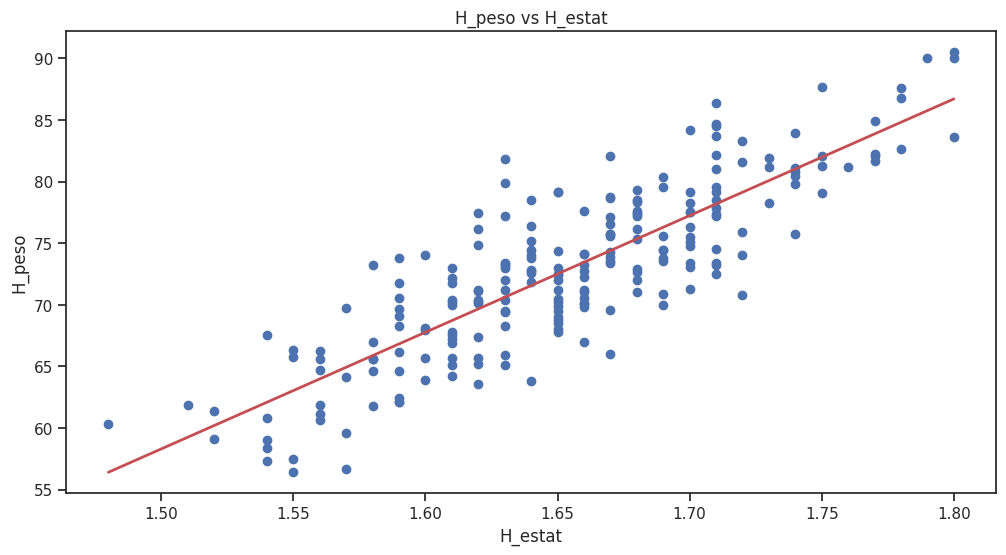

In [5]:
men = df[["H_peso", "H_estat"]].sort_values(by="H_estat")
model = smf.ols('H_peso ~ H_estat', data=men)
model = model.fit()
print(model.params)

y_preds = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(men['H_estat'], men['H_peso'], 'o')         
plt.plot(men['H_estat'], y_preds, 'r', linewidth=2) 
plt.xlabel('H_estat')
plt.ylabel('H_peso')
plt.title('H_peso vs H_estat')

plt.show()

y = 94.660240x - 83.684539

In [6]:
mod = sm.OLS(df.H_peso, df.H_estat)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 H_peso   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.054e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   5.74e-261
Time:                        16:05:11   Log-Likelihood:                         -657.59
No. Observations:                 220   AIC:                                      1317.
Df Residuals:                     219   BIC:                                      1321.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El R2 indica que el modelo obtenido se ajusta bien a los datos presentados

distribuidos normalmente
p-value abajo de 0.05 por lo general indica que no es normal: 0.9488942742952631


/home/repos/work/work/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


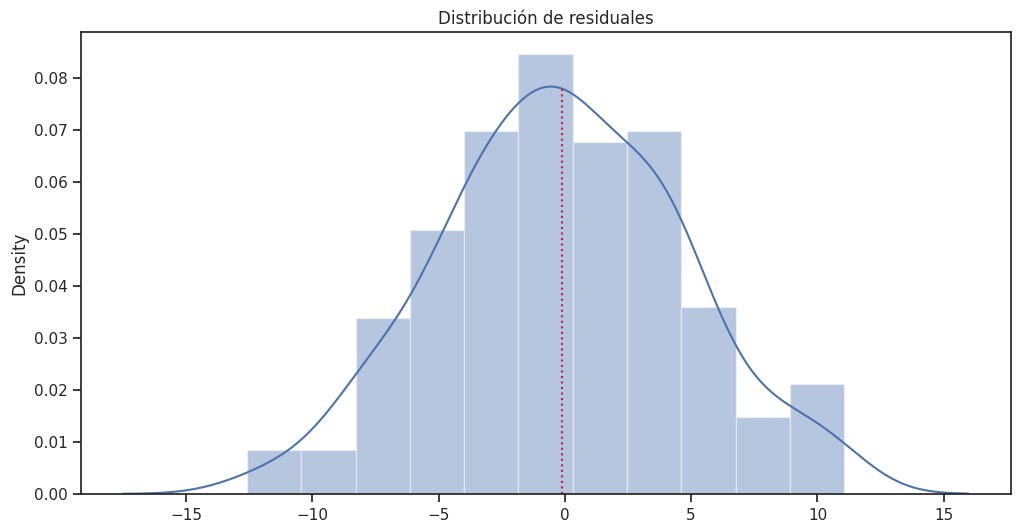

In [7]:
# HIPOTESIS - NORMALIDAD
# h0 pvalue >  0.05
# h1  pvalue < 0.05

# HIPOTESIS  - MEDIA
# h0 mean = 0
# h1 neab != 0

p_value = normal_ad(res.resid)[1]
# REGLA DE DECISIÓN - NORMALIDAD
if p_value < 0.05:
    print('No distribuidos normalmente')
else:
    print('distribuidos normalmente')

p_value = normal_ad(res.resid)[1]
print('p-value abajo de 0.05 por lo general indica que no es normal:', p_value)

plt.subplots(figsize=(12, 6))
plt.title('Distribución de residuales')
ax = sns.distplot(res.resid)
dline = ax.lines[0]
mean = res.resid.mean()
xs = dline.get_xdata()
ys = dline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
plt.show()
# REGLA DE DECISIÓN - MEDIA
  # Debe estar cercana a 0 en la distrbiución

La media está lo suficientemente cercca de zero para decir que es normal


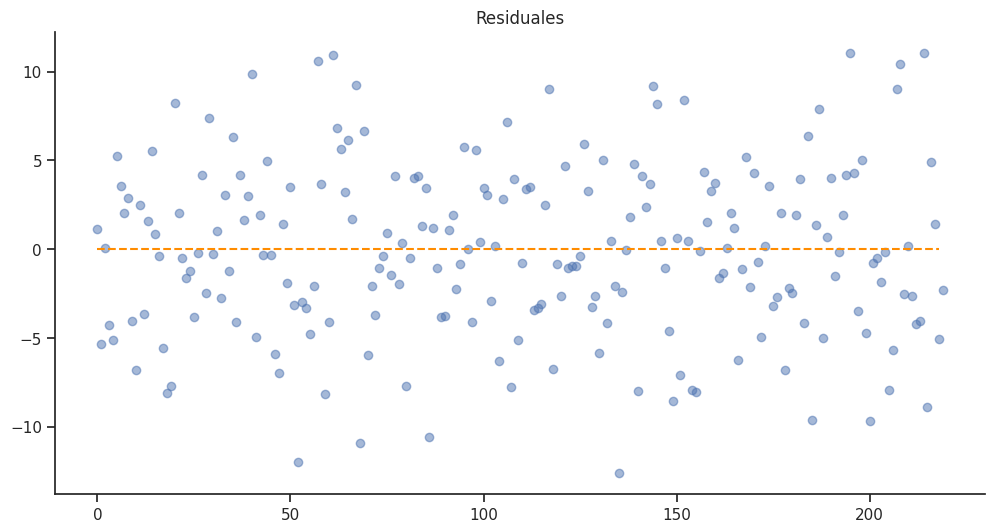

In [8]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=res.resid.index, y=res.resid, alpha=0.5)
plt.plot(np.repeat(0, res.resid.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuales')
plt.show()  

La varianza parece ser uniforme

B1 sí es significativa

Intercept   -72.560448
M_estat      81.149107
dtype: float64


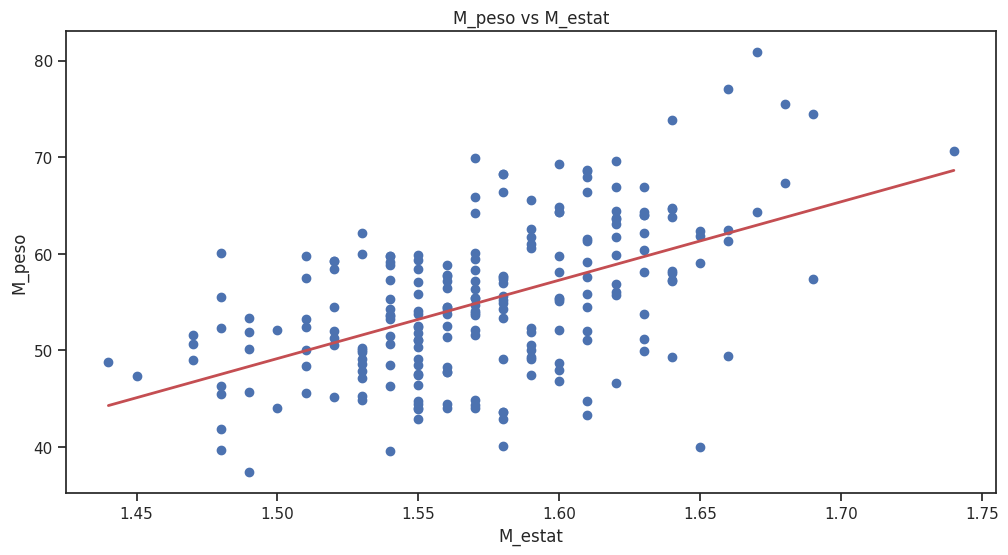

In [9]:
woman = df[["M_peso", "M_estat"]].sort_values(by="M_estat")
model = smf.ols('M_peso ~ M_estat', data=woman)
model = model.fit()
print(model.params)

y_preds = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(woman['M_estat'], woman['M_peso'], 'o')           
plt.plot(woman['M_estat'], y_preds, 'r', linewidth=2)  
plt.xlabel('M_estat')
plt.ylabel('M_peso')
plt.title('M_peso vs M_estat')

plt.show()

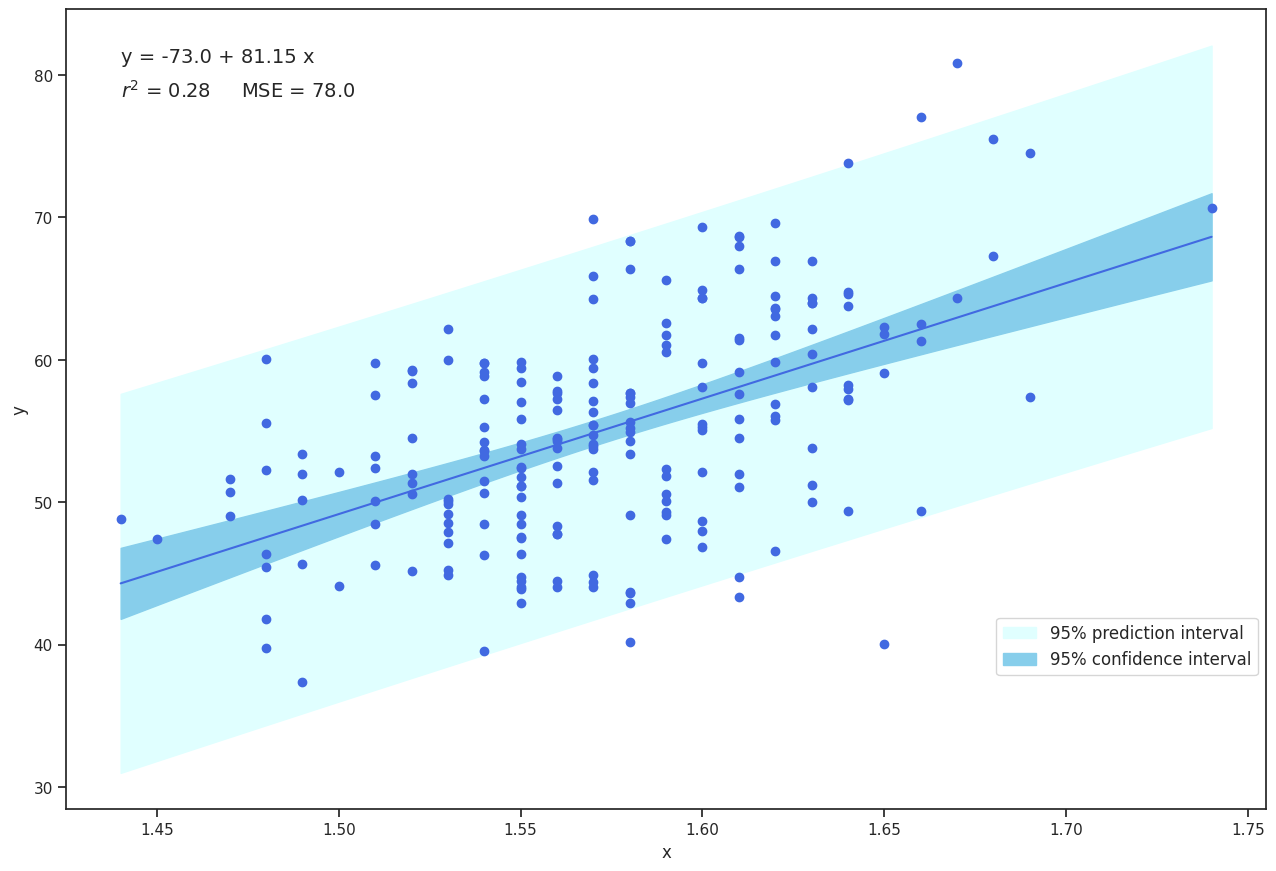

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

intercept, slope = model.params  # linear model adjustment

n = len(df)                    # number of samples
m = 1                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = woman["M_peso"] - y_preds

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
# Pearson's correlation coefficient
numerator = np.sum((df["M_estat"] - df["M_estat"].mean())*(df["M_peso"] - df["M_peso"].mean()))
denominator = ( np.sum((df["M_estat"] - df["M_estat"].mean())**2) * np.sum((df["M_peso"] - df["M_peso"].mean())**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error
MSE = 1/n * np.sum( (df["M_peso"] - y_preds)**2 )

# to plot the adjusted model
x_line = np.linspace(np.min(df["M_estat"]), np.max(df["M_estat"]), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - df["M_estat"].mean())**2 / np.sum((df["M_estat"] - df["M_estat"].mean())**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - df["M_estat"].mean())**2 / np.sum((df["M_estat"] - df["M_estat"].mean())**2))**.5  

############### Ploting
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([.1, .1, .8, .8])

ax.plot(df["M_estat"], df["M_peso"], 'o', color = 'royalblue')
ax.plot(x_line, y_line, color = 'royalblue')
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

ax.set_xlabel('x')
ax.set_ylabel('y')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

ax.text(df["M_estat"].min(), df["M_peso"].max(), 'y = ' + a + ' + ' + b + ' x')
ax.text(df["M_estat"].min(), df["M_peso"].max()*.97, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)

plt.legend(bbox_to_anchor=(1, .25), fontsize=12)


y =  81.149107x -72.560448

In [ ]:
mod = sm.OLS(df.M_peso, df.M_estat)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 M_peso   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.356e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                   5.93e-199
Time:                        20:33:51   Log-Likelihood:                         -740.69
No. Observations:                 220   AIC:                                      1483.
Df Residuals:                     219   BIC:                                      1487.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El R2 indica que el modelo obtenido se ajusta bien a los datos presentados

distribuidos normalmente
p-value abajo de 0.05 por lo general indica que no es normal: 0.597423642997243


/home/repos/WORK/work/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


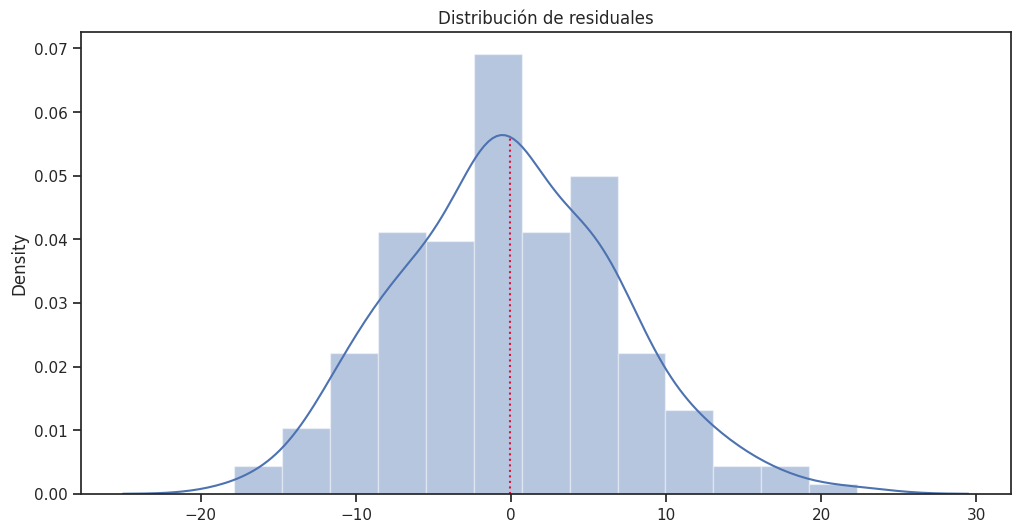

In [ ]:
# HIPOTESIS - NORMALIDAD
# h0 pvalue >  0.05
# h1  pvalue < 0.05

# HIPOTESIS  - MEDIA
# h0 mean = 0
# h1 neab != 0

p_value = normal_ad(res.resid)[1]
# REGLA DE DECISIÓN - NORMALIDAD
if p_value < 0.05:
    print('No distribuidos normalmente')
else:
    print('distribuidos normalmente')

p_value = normal_ad(res.resid)[1]
print('p-value abajo de 0.05 por lo general indica que no es normal:', p_value)

plt.subplots(figsize=(12, 6))
plt.title('Distribución de residuales')
ax = sns.distplot(res.resid)
dline = ax.lines[0]
mean = res.resid.mean()
xs = dline.get_xdata()
ys = dline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
plt.show()
# REGLA DE DECISIÓN - MEDIA
  # Debe estar cercana a 0 en la distrbiución

La media está lo suficientemente cercana a cero para decir que es normal

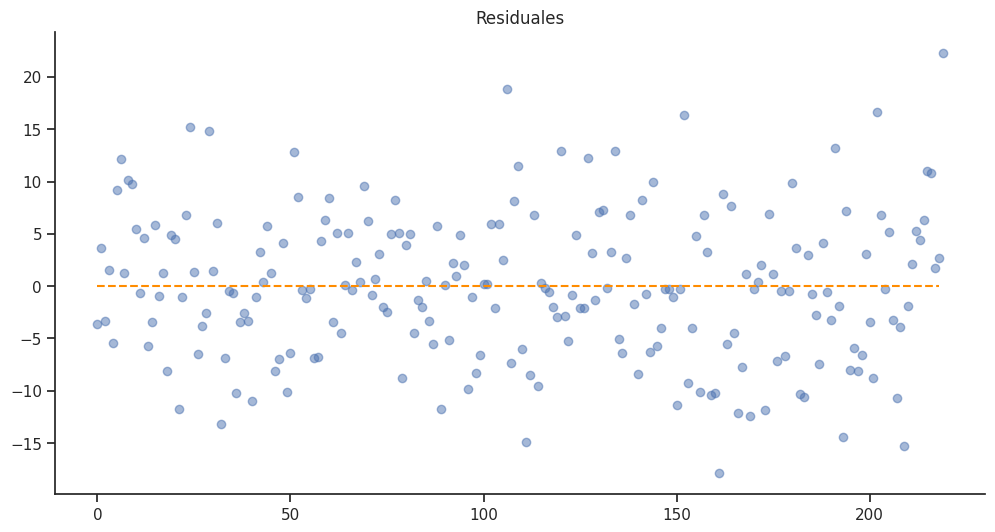

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=res.resid.index, y=res.resid, alpha=0.5)
plt.plot(np.repeat(0, res.resid.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuales')
plt.show()  

La varianza no parece uniforme

b1 si es significativa

¿Qué información proporciona β̂0 sobre la relación entre la estatura y el peso de hombres y mujeres?
       está dificil interpretar B0 desde que el peso de un humano no debería ser 0, pero puede
       relacionarse a que la correción de donde comienzan los pesos de un hombre es más bajo que los de la mujer
       pero que conforme la estatura aumetan más rápido
¿Cómo interpretas β̂1 en la relación entre la estatura y el peso de hombres y mujeres?
       dice que la estatura es un factor que incrementa por más la predicción del peso en hombres q en mujeres
    

# CONCLUSIÓN

Puedo decir que las regresiones lineales que tuvimos aquí tienen factores para ser buenas, pero la de los hombres definitivamente es mejor descriptora del fenómena que la de las mujeres